## **📌 What FX Data Do We Need?**
To apply Vanna-Volga to FX Barrier Options, we need market-implied volatilities for different strikes:

-At-the-Money (ATM) Volatility → Volatility for options where strike = spot.

-Risk Reversal (RR) Volatility → Measures skewness in the volatility surface.

-Butterfly Spread (BF) Volatility → Measures volatility curvature.

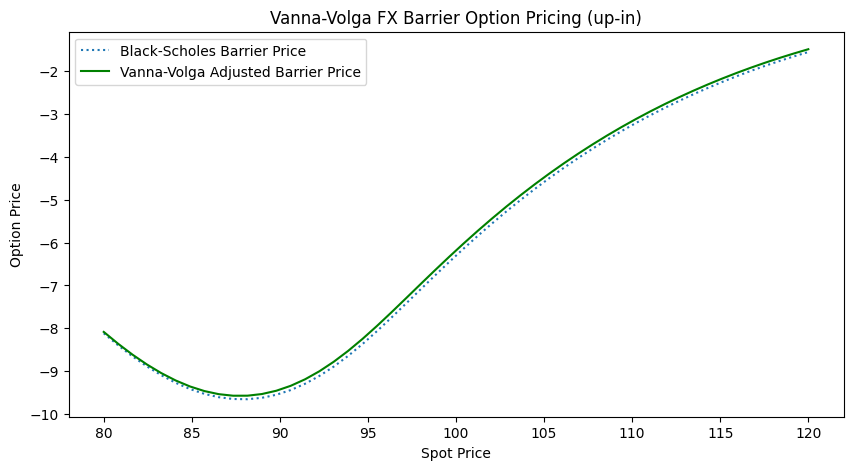

In [1]:
# Vanna-Volga Adjustment for FX Barrier Options

import sys
sys.path.append('../src')  # Ensure src directory is accessible

import numpy as np
import matplotlib.pyplot as plt
from vanna_volga_barrier import VannaVolgaBarrier

# Define parameters
spot_prices = np.linspace(80, 120, 50)
strike_price = 100
time_to_maturity = 1
volatility = 0.2
domestic_rate = 0.05
foreign_rate = 0.02
barrier_level = 110
barrier_type = "up-in"

# Market-implied volatilities (Real data should be used if available)
market_volatility_atm = 0.18  # At-the-money volatility
market_volatility_rr = 0.02   # Risk reversal (market skew)
market_volatility_bf = 0.01   # Butterfly spread

vv_barrier_prices = []
bs_barrier_prices = []

# Compute Vanna-Volga adjusted and Black-Scholes barrier prices
for S in spot_prices:
    vv_barrier_model = VannaVolgaBarrier(S, strike_price, time_to_maturity, volatility, 
                                         domestic_rate, foreign_rate, barrier_level, barrier_type, 
                                         market_volatility_atm, market_volatility_rr, market_volatility_bf)
    
    bs_barrier_prices.append(vv_barrier_model.calculate_barrier_price())
    vv_barrier_prices.append(vv_barrier_model.calculate_vanna_volga_barrier_price())

# Plot results
plt.figure(figsize=(10,5))
plt.plot(spot_prices, bs_barrier_prices, label="Black-Scholes Barrier Price", linestyle="dotted")
plt.plot(spot_prices, vv_barrier_prices, label="Vanna-Volga Adjusted Barrier Price", linestyle="solid", color="green")
plt.xlabel("Spot Price")
plt.ylabel("Option Price")
plt.title(f"Vanna-Volga FX Barrier Option Pricing ({barrier_type})")
plt.legend()
plt.show()
